In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set(color_codes = True)

In [2]:
#Load the Dataset
data = pd.read_csv("Medicalpremium.csv")
data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [3]:
#To get information like Datatype, #Entries etc.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [4]:
# Summary of the dataset.
data.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [5]:
#Print shape of a Dataset with rows and columns
data.shape

(986, 11)

In [6]:
#Check if any variable is having null value
data.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

## Inference
#### There are no null record present in the dataset.

In [7]:
data.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [8]:
# Rows containing duplicated data
duplicate_data = data[data.duplicated()]
print(duplicate_data.shape)

(0, 11)


<AxesSubplot:xlabel='PremiumPrice', ylabel='count'>

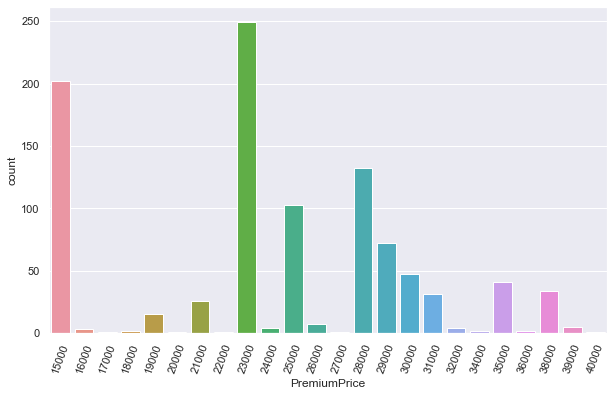

In [9]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=70)
sns.countplot(x='PremiumPrice', data=data)

## Inference
#### The PremiumPrice of most of the rows in the dataset is 23000.

<AxesSubplot:xlabel='Age'>

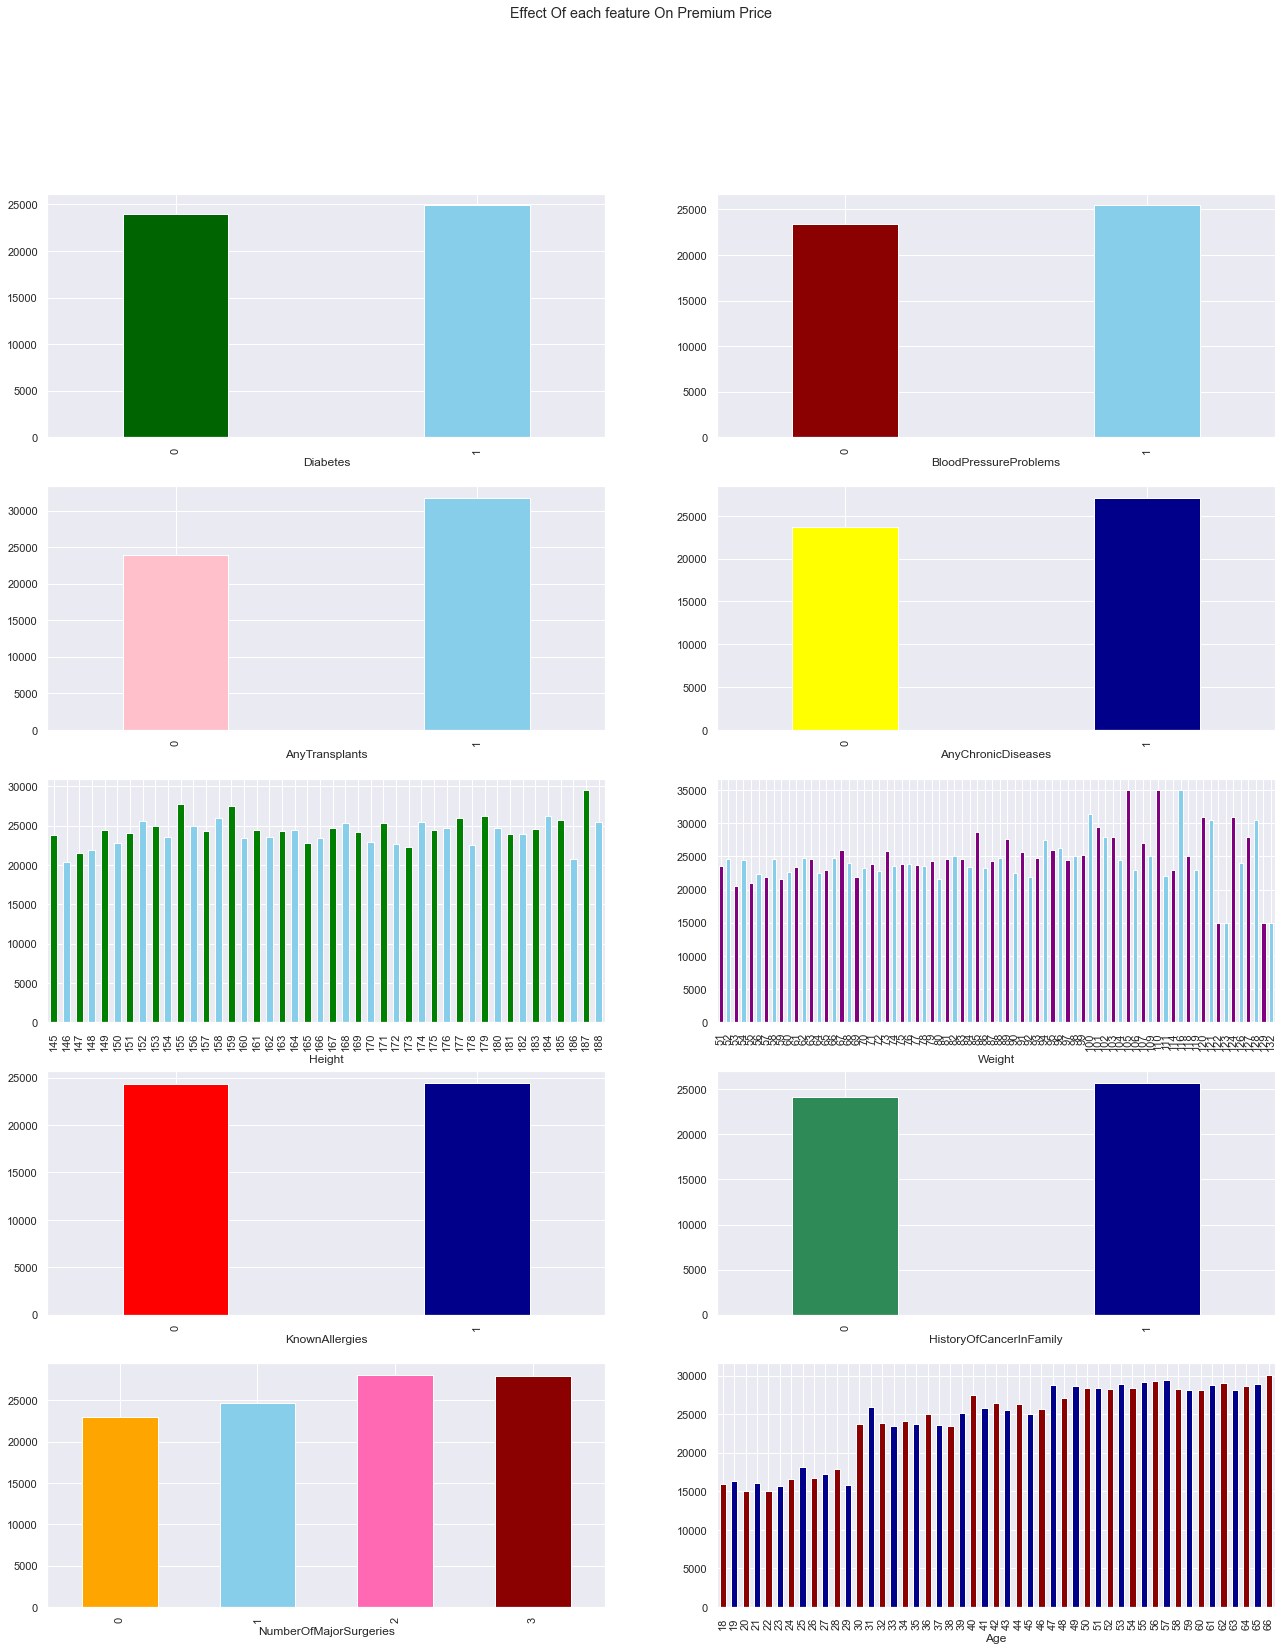

In [10]:
#Effect Of each feature On Premium Price

fig, axes = plt.subplots(5, 2, figsize=(22, 26))
fig.suptitle('Effect Of each feature On Premium Price')

data.groupby('Diabetes')['PremiumPrice'].mean().plot.bar(width=0.35, color =['DarkGreen', 'skyblue'], ax = axes[0,0]);


data.groupby('BloodPressureProblems')['PremiumPrice'].mean().plot.bar(width=0.35, color =['Darkred', 'skyblue'], ax = axes[0,1]);


data.groupby('AnyTransplants')['PremiumPrice'].mean().plot.bar(width=0.35, color =['pink', 'skyblue'], ax = axes[1,0])

data.groupby('AnyChronicDiseases')['PremiumPrice'].mean().plot.bar(width=0.35, color =['yellow', 'Darkblue'], ax = axes[1,1])

data.groupby('Height')['PremiumPrice'].mean().plot.bar(width=0.55, color =['green', 'skyblue'], ax = axes[2,0])

data.groupby('Weight')['PremiumPrice'].mean().plot.bar(width=0.55, color =['purple', 'skyblue'], ax = axes[2,1])

data.groupby('KnownAllergies')['PremiumPrice'].mean().plot.bar(width=0.35, color =['red', 'Darkblue'], ax = axes[3,0])
data.groupby('HistoryOfCancerInFamily')['PremiumPrice'].mean().plot.bar(width=0.35, color =['seagreen', 'Darkblue'], ax = axes[3,1])
data.groupby('NumberOfMajorSurgeries')['PremiumPrice'].mean().plot.bar(width=0.55, color =['orange', 'skyblue', 'Hotpink', 'Darkred'], ax = axes[4,0])
data.groupby('Age')['PremiumPrice'].mean().plot.bar(width=0.55, color =['Darkred', 'Darkblue'], ax = axes[4,1])



## Inference
#### Most of the Categorical feature with true value have high effect on PremiumPrice.

<AxesSubplot:xlabel='PremiumPrice', ylabel='Count'>

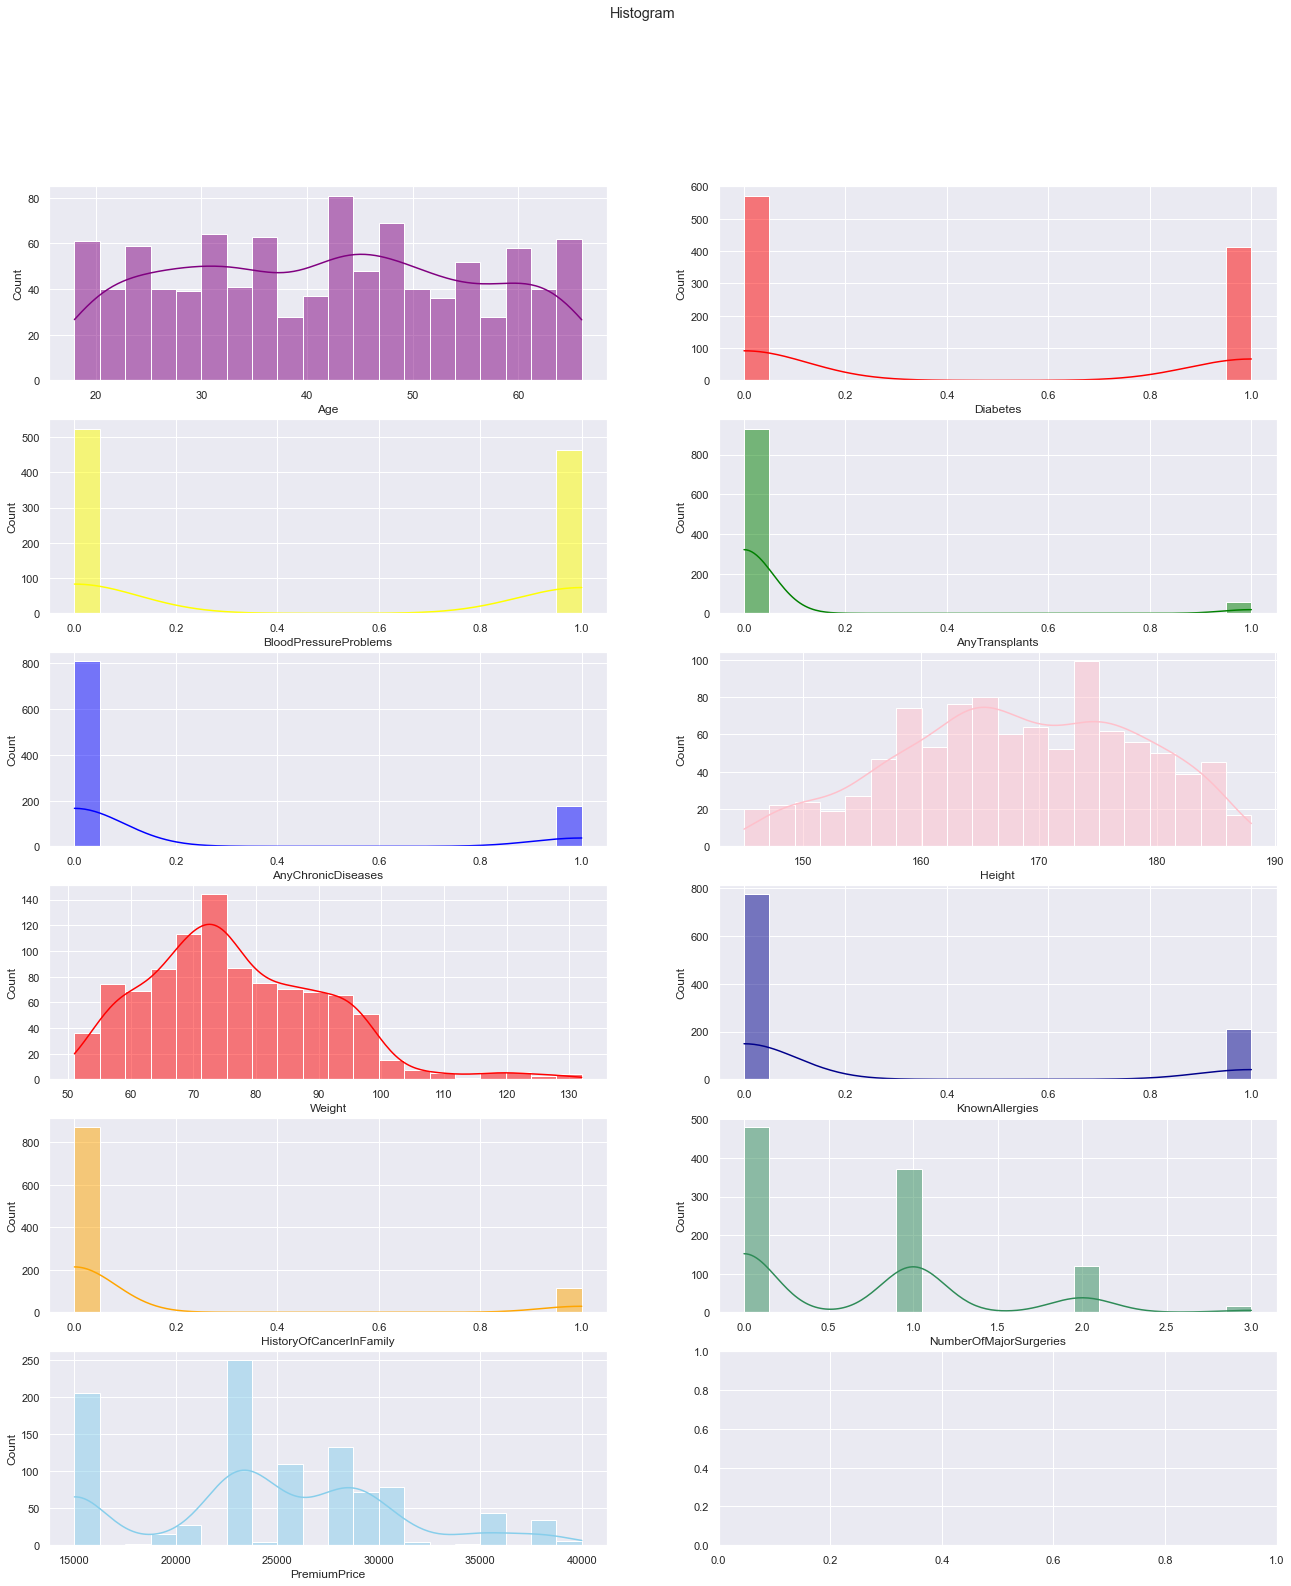

In [11]:
#Distribution in each feature.

fig, axes = plt.subplots(6, 2, figsize=(22, 25))
fig.suptitle('Histogram')
sns.histplot(x='Age', data=data, bins=20, kde=True, color='purple', ax = axes[0,0])
sns.histplot(x='Diabetes', data=data, bins=20, kde=True, color='red', ax = axes[0,1])
sns.histplot(x='BloodPressureProblems', data=data, bins=20, kde=True, color='yellow', ax = axes[1,0])
sns.histplot(x='AnyTransplants', data=data, bins=20, kde=True, color='green', ax = axes[1,1])
sns.histplot(x='AnyChronicDiseases', data=data, bins=20, kde=True, color='blue', ax = axes[2,0])
sns.histplot(x='Height', data=data, bins=20, kde=True, color='pink', ax = axes[2,1])
sns.histplot(x='Weight', data=data, bins=20, kde=True, color='red', ax = axes[3,0])
sns.histplot(x='KnownAllergies', data=data, bins=20, kde=True, color='Darkblue', ax = axes[3,1])
sns.histplot(x='HistoryOfCancerInFamily', data=data, bins=20, kde=True, color='orange', ax = axes[4,0])
sns.histplot(x='NumberOfMajorSurgeries', data=data, bins=20, kde=True, color='seagreen', ax = axes[4,1])
sns.histplot(x='PremiumPrice', data=data, bins=20, kde=True, color='skyblue', ax = axes[5,0])

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
Age,1.000000,0.210908,0.244888,-0.008549,0.051072,0.039879,-0.018590,-0.024416,-0.027623,0.429181,0.697540
Diabetes,0.210908,1.000000,0.127727,-0.036652,-0.089428,-0.003783,-0.024563,-0.080102,-0.055527,0.122722,0.076209
BloodPressureProblems,0.244888,0.127727,1.000000,-0.024538,0.045424,-0.037926,-0.061016,-0.011550,0.048239,0.251568,0.167097
AnyTransplants,-0.008549,-0.036652,-0.024538,1.000000,0.035285,-0.031543,0.002087,0.001876,-0.020171,-0.004154,0.289056
AnyChronicDiseases,0.051072,-0.089428,0.045424,0.035285,1.000000,0.047419,-0.033318,-0.027418,0.008666,0.014835,0.208610
Height,0.039879,-0.003783,-0.037926,-0.031543,0.047419,1.000000,0.066946,-0.010200,0.010549,0.037289,0.026910
Weight,-0.018590,-0.024563,-0.061016,0.002087,-0.033318,0.066946,1.000000,0.037492,0.003481,-0.006108,0.141507
KnownAllergies,-0.024416,-0.080102,-0.011550,0.001876,-0.027418,-0.010200,0.037492,1.000000,0.115383,0.103923,0.012103
HistoryOfCancerInFamily,-0.027623,-0.055527,0.048239,-0.020171,0.008666,0.010549,0.003481,0.115383,1.000000,0.212657,0.083139
NumberOfMajorSurgeries,0.429181,0.122722,0.251568,-0.004154,0.014835,0.037289,-0.006108,0.103923,0.212657,1.000000,0.264250


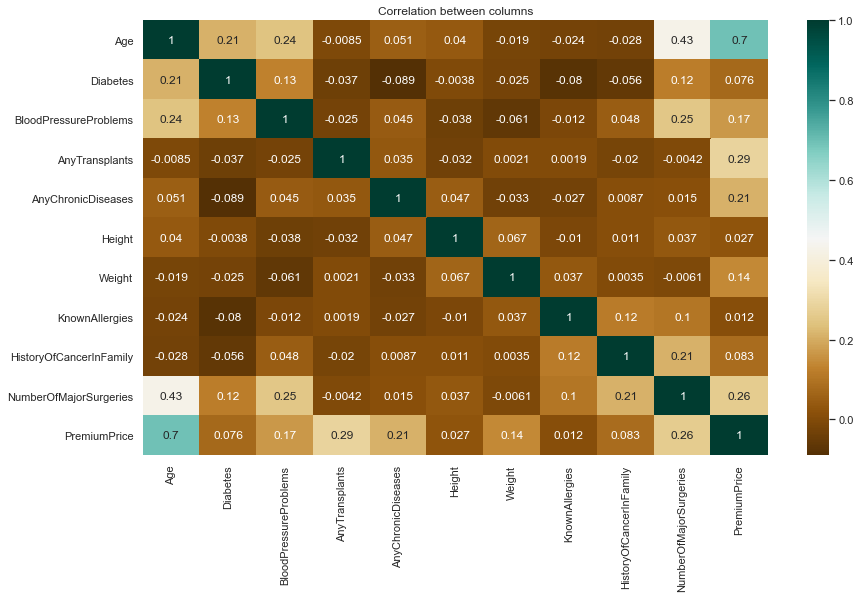

In [12]:
#Relationship between each features.

plt.figure(figsize = (14,8))
cor = data.corr()
sns.heatmap(cor,cmap ="BrBG" , annot = True)
plt.title('Correlation between columns')
cor

## Inference
#### 'Diabetes' and 'AnyChronicDiseases' are highly negatively correlated. Hence, we could remove any one of them from our dataset to reduce the redundancy.
#### 'Diabetes' and 'KnownAllergies' are also highly negatively correlated.Hence, we could remove any one of them from our dataset to reduce redundancy .